## Modeling Groundwater fluctuation in Al Ain City, UAE

## 1. Preparing and Processing the data before inserting it to the Neural Network

### 1.1 Importing the Python Libraries

In [1]:
from fastai.tabular.all import *
import pandas as pd
import pathlib
from itertools import chain
import copy

### 1.2 Importing the data into the program

In [2]:
path= pathlib.WindowsPath('F:\Code\Sample DataTOT.xlsx')
data= pd.read_excel(path, sheet_name=None)
data['GWP-477']

,X,Y,YEAR,TIME,Readings,Evaporation,Rain,Temperature,Humidity,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,360735,2669963,2000-01-01,0,NaN,208.0,NaN,NaN,NaN,NaN,NaN,NaN
1,360735,2669963,2000-02-01,1,NaN,235.5,NaN,NaN,NaN,NaN,NaN,NaN
2,360735,2669963,2000-03-01,2,NaN,371.1,NaN,NaN,NaN,NaN,NaN,NaN
3,360735,2669963,2000-04-01,3,NaN,509.0,NaN,NaN,NaN,NaN,NaN,NaN
4,360735,2669963,2000-05-01,4,NaN,592.4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
247,360735,2669963,2020-08-01,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,360735,2669963,2020-09-01,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,360735,2669963,2020-10-01,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,360735,2669963,2020-11-01,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3 Removing extra Wells and Surplus readings

In [3]:
WellsNum = list(data.keys())
WellsNum

['GWP-012',
 'GWP-013',
 'GWP-062',
 'GWP-064',
 'GWP-065',
 'GWP-334A',
 'GWP-334B',
 'GWP-477',
 'GWP-479',
 'GWP-480']

In [4]:
GWL=pd.DataFrame()
dropindx=list(chain(range(0,48),range(180,252))) #Range of Important data (covering the period of Jan2004-Dec2012), so we use them and discard the rest
for x in WellsNum:
    data[x].drop(labels=dropindx,inplace=True)
    data[x].interpolate(method='pad',inplace=True)
    rng = list(range(len(data[x].index)))
    for i in rng:
        GWL=GWL.append([[x,data[x].iloc[i,0],data[x].iloc[i,1],data[x].iloc[i,2],data[x].iloc[i,3],data[x].iloc[i,4],data[x].iloc[i,5],data[x].iloc[i,6],data[x].iloc[i,7],data[x].iloc[i,8]]], ignore_index=True)
GWL.pop(4)
GWL.rename(columns={0:'Name',1: 'x',2:'y', 3:'TIME', 4:'YEAR',5: 'Readings',6: 'Evaporation',7:'Rain', 8: 'Temperature', 9:'Humidity'}, inplace=True)

In [5]:
GWL #Checking the Data After organaising and filtering them

,Name,x,y,TIME,Readings,Evaporation,Rain,Temperature,Humidity
0,GWP-012,333515,2670609,2004-01-01,34.97,198.2,0.0,26.4,64.96774
1,GWP-012,333515,2670609,2004-02-01,34.97,259.6,4.8,24.2,64.00000
2,GWP-012,333515,2670609,2004-03-01,34.58,423.5,0.0,24.5,55.86207
3,GWP-012,333515,2670609,2004-04-01,34.69,479.3,0.0,27.5,41.29032
4,GWP-012,333515,2670609,2004-05-01,34.08,589.9,0.0,31.0,38.60000
...,...,...,...,...,...,...,...,...,...
1315,GWP-480,360557,2676180,2014-08-01,229.57,526.8,5.0,40.2,37.80645
1316,GWP-480,360557,2676180,2014-09-01,229.57,461.8,0.0,38.8,37.80000
1317,GWP-480,360557,2676180,2014-10-01,229.57,420.4,0.2,34.9,41.41935
1318,GWP-480,360557,2676180,2014-11-01,229.57,264.1,1.2,29.8,49.63330


### 1.4 Investigate the data and check for missing Values

In [6]:
print(GWL.nunique())
GWL.isnull().sum()

Name            10
x               10
y               10
TIME           132
Readings       575
Evaporation    132
Rain            45
Temperature     88
Humidity       131
dtype: int64


Name           0
x              0
y              0
TIME           0
Readings       1
Evaporation    0
Rain           0
Temperature    0
Humidity       0
dtype: int64

In [8]:
# GWL.to_excel('CleanData.xlsx')

### 1.5 Interpolate the missing Values using Linear interpolation

In [7]:
GWL.interpolate(method='pad',inplace=True)
GWL

,Name,x,y,TIME,Readings,Evaporation,Rain,Temperature,Humidity
0,GWP-012,333515,2670609,2004-01-01,34.97,198.2,0.0,26.4,64.96774
1,GWP-012,333515,2670609,2004-02-01,34.97,259.6,4.8,24.2,64.00000
2,GWP-012,333515,2670609,2004-03-01,34.58,423.5,0.0,24.5,55.86207
3,GWP-012,333515,2670609,2004-04-01,34.69,479.3,0.0,27.5,41.29032
4,GWP-012,333515,2670609,2004-05-01,34.08,589.9,0.0,31.0,38.60000
...,...,...,...,...,...,...,...,...,...
1315,GWP-480,360557,2676180,2014-08-01,229.57,526.8,5.0,40.2,37.80645
1316,GWP-480,360557,2676180,2014-09-01,229.57,461.8,0.0,38.8,37.80000
1317,GWP-480,360557,2676180,2014-10-01,229.57,420.4,0.2,34.9,41.41935
1318,GWP-480,360557,2676180,2014-11-01,229.57,264.1,1.2,29.8,49.63330


In [10]:
# GWL.to_excel('InterpolatedData(Pad)2.xlsx')

### 1.6 Create a backup copy of the processed data incase the need arise to undo any unexpected Modificaitons

In [8]:
test=copy.deepcopy(GWL)

In [9]:
GWL=copy.deepcopy(test)

## 2. Preparing the Neural Network to recieve the data

### 2.1 Determining the type of data fed into the network and the processes done to convert the data to acceptable format

In [10]:
cont_names=[ 'Evaporation', 'Rain', 'Temperature', 'Humidity']
cat_names = ['Name','TIME', 'x','y']
procs=[Normalize, Categorify]
y_names='Readings'

### 2.2 Create a Training and Verification samples

In [11]:
# x=list(range(0,1189,132))            #values for the Conference Paper
# y=list(range(108,1188,132))          #values for the Conference Paper
x=list(range(0,1321,132))              #values for the Expo2020 Video
y=list(range(108,1320,132))            #values for the Expo2020 Video
samplist=[]
valist=[]
for i in list(range(len(WellsNum))):  #The Range represent the number of wells (including zero)
    samplist=samplist+(list(range(x[i],y[i])))
    valist=valist+(list(range(y[i],x[i+1])))
splits= (samplist,valist)

### 5.3 Create a DataLoader to collect the corrected data, ranges and required processes

In [12]:
to= TabularPandas(GWL, procs=procs, cat_names=cat_names, cont_names=cont_names, splits=splits, y_names=y_names, y_block= RegressionBlock())

### 5.4 Create a range of prediciton to increase the accuracy and decrease the training time

In [13]:
y=to.train.y
y_range=((y.min(),y.max()*1.2))
y_range

(26.280000686645508, 294.20399780273436)

## 3 Create & Train the Model

### 3.1 Set the Seed, create the Learner and determine the Best Possible Hyperparameters

In [14]:
set_seed(42)
dls = to.dataloaders(15)
learn = tabular_learner(dls, layers=[700,200,600,100,9], metrics=[rmse,R2Score(),PearsonCorrCoef()],opt_func=ranger, y_range=y_range)
learn.path = Path('F:\\Code\\Files')

Better model found at epoch 0 with r2_score value: -0.058932374092227846.


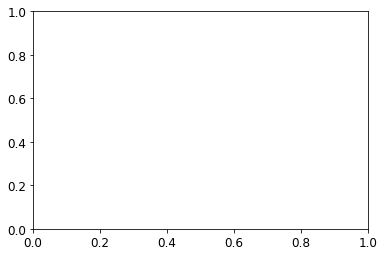

Better model found at epoch 1 with r2_score value: -0.008675616106832429.
Better model found at epoch 2 with r2_score value: 0.02657399726037102.
Better model found at epoch 3 with r2_score value: 0.12568779123849216.
Better model found at epoch 4 with r2_score value: 0.45199344476871217.
Better model found at epoch 5 with r2_score value: 0.657481015226774.
Better model found at epoch 6 with r2_score value: 0.7550596711097342.
Better model found at epoch 7 with r2_score value: 0.8471273325873313.
Better model found at epoch 8 with r2_score value: 0.9018687299273661.
Better model found at epoch 9 with r2_score value: 0.9195434354367659.
Better model found at epoch 11 with r2_score value: 0.9541004924343153.
Better model found at epoch 17 with r2_score value: 0.9661124615660605.
Better model found at epoch 27 with r2_score value: 0.977153721727552.


In [15]:
learn.fit_one_cycle(50,cbs=[ShowGraphCallback(),SaveModelCallback(monitor='r2_score',min_delta=0.01),TrackerCallback()])

### 3.4 Find the Standard Deviation of the readings to check the Goodness of the Model Training and Predicitons

In [16]:
GWL['Readings'].std()

65.25466785198563

### 3.4 Save and Export the Model

In [18]:
# check the i number
global x
x= learn
x.export('GEOL720.pkl')
learn.save('AlAin2')
x

AttributeError: Can't pickle local object 'PearsonCorrCoef.<locals>.pearsonr'

## 4 Prediction

### 4.1 Load and save the parameters as Test Dataset

In [22]:
path= 'F:\\Code\\PredictionsExpo2.xlsx'
PredParam= pd.read_excel(path,sheet_name=None)
Years = list(PredParam.keys())

### 4.2 Get the Prediciton Parameters

In [24]:
PredicitonYears=list(range(len((Years))))
writer = pd.ExcelWriter('F:\\Code\\Predicted.xlsx',engine="openpyxl",mode='a')

### 4.3 Extract and Save the Prediction into CSV file

In [25]:
for i in PredicitonYears:
    year=i
    dl = learn.dls.test_dl(PredParam[Years[year]])
    PredData=learn.get_preds(dl=dl)                                    #Get the Prediciton
    PredParam[Years[year]]['Predictions']=PredData[0]
    PredParam[Years[year]].to_excel(writer,sheet_name=Years[year])
writer.save()
writer.close()